In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
csv_path = '../csv/BTC/KRW_BTC_day.csv'

df = pd.read_csv(csv_path)
df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.tail()

,open,high,low,close,volume,value
date,,,,,,
2024-05-19 09:00:00,93066000.0,93990000.0,91843000.0,92185000.0,2335.848485,2.170376e+11
2024-05-20 09:00:00,92185000.0,97264000.0,91931000.0,97260000.0,4413.186165,4.168862e+11
2024-05-21 09:00:00,97260000.0,98150000.0,95571000.0,96700000.0,4609.756504,4.475724e+11
2024-05-22 09:00:00,96717000.0,96999000.0,94640000.0,95421000.0,2799.801570,2.685380e+11
2024-05-23 09:00:00,95421000.0,96881000.0,93000000.0,94900000.0,4396.134362,4.175072e+11


In [30]:
# https://tvextbot.github.io/posts/strategies/indicator_vbi/
# 1일봉에만 사용가능합니다. 그이외의 시간봉에서는 사용하지 마세요.
# ① 전날의 일봉 기준 range(= 전일 고가 – 전일 저가)를 계산합니다.
# ② 당일 장중 가격이 당일시가 + (전일 range 값 * K)을 넘을 경우 매수 합니다. (K = 노이즈비율)
# ③ 익일 시가 기준으로 지정가 매도를 합니다.

# 변동성 돌파 전략 시뮬레이션
def volatility_break_out_strategy(df, k):
    df = df.copy()
    
    df['range'] = df['high'] - df['low']
    df['target'] = df['open'] + df['range'].shift(1) * k
    df['next_open'] = df['open'].shift(-1)

    # 맨앞과 맨뒤에 목표가가 Nan인 row 제거
    df = df.dropna()
  
    cond = df['high'] > df['target']
    수익률 = df.loc[cond, 'next_open'] / df.loc[cond, 'target']
        
    # 슬리피지를 0.002로 고려
    수익률 = 수익률 - 0.002
    누적수익률 = 수익률.cumprod()
    기간수익률 = 누적수익률.iloc[-1]

    # 1년이라 누적수익률과 CAGR이 같음
    N = (df.index[-1] - df.index[0]).days / 365
    CAGR = (기간수익률 ** (1/N)) - 1
    
    return CAGR, 누적수익률

In [31]:
CAGR_dict = {}

for k in range(1, 21):
  CAGR, 누적수익률 = volatility_break_out_strategy(df, k/10)
  CAGR_dict[f'{k/10}'] = CAGR
  print(f'range 가중치 : {k/10}, CAGR 수익률 : {CAGR}')

range 가중치 : 0.1, CAGR 수익률 : -0.1295762978940863
range 가중치 : 0.2, CAGR 수익률 : -0.044168249131539494
range 가중치 : 0.3, CAGR 수익률 : 0.5102749959738535
range 가중치 : 0.4, CAGR 수익률 : 0.4410051302722784
range 가중치 : 0.5, CAGR 수익률 : 0.5071052816140673
range 가중치 : 0.6, CAGR 수익률 : 0.3978451240637191
range 가중치 : 0.7, CAGR 수익률 : 0.49445675402723444
range 가중치 : 0.8, CAGR 수익률 : 0.44088810076122775
range 가중치 : 0.9, CAGR 수익률 : 0.35342163652098435
range 가중치 : 1.0, CAGR 수익률 : 0.2861381873950426
range 가중치 : 1.1, CAGR 수익률 : 0.2779625061237796
range 가중치 : 1.2, CAGR 수익률 : 0.27895006047355286
range 가중치 : 1.3, CAGR 수익률 : 0.24707100768434032
range 가중치 : 1.4, CAGR 수익률 : 0.24326100477013934
range 가중치 : 1.5, CAGR 수익률 : 0.3198061300104995
range 가중치 : 1.6, CAGR 수익률 : 0.2667457816323673
range 가중치 : 1.7, CAGR 수익률 : 0.20486835713088558
range 가중치 : 1.8, CAGR 수익률 : 0.19285588667376374
range 가중치 : 1.9, CAGR 수익률 : 0.17386323487712008
range 가중치 : 2.0, CAGR 수익률 : 0.16279325025934455


In [32]:
from operator import itemgetter
sorted(CAGR_dict.items(), key=itemgetter(1), reverse=True)

[('0.3', 0.5102749959738535),
 ('0.5', 0.5071052816140673),
 ('0.7', 0.49445675402723444),
 ('0.4', 0.4410051302722784),
 ('0.8', 0.44088810076122775),
 ('0.6', 0.3978451240637191),
 ('0.9', 0.35342163652098435),
 ('1.5', 0.3198061300104995),
 ('1.0', 0.2861381873950426),
 ('1.2', 0.27895006047355286),
 ('1.1', 0.2779625061237796),
 ('1.6', 0.2667457816323673),
 ('1.3', 0.24707100768434032),
 ('1.4', 0.24326100477013934),
 ('1.7', 0.20486835713088558),
 ('1.8', 0.19285588667376374),
 ('1.9', 0.17386323487712008),
 ('2.0', 0.16279325025934455),
 ('0.2', -0.044168249131539494),
 ('0.1', -0.1295762978940863)]

In [33]:
CAGR, 누적수익률 = volatility_break_out_strategy(df, 0.5)
#print(CAGR)
print(누적수익률)

date
2023-05-03 09:00:00    0.990340
2023-05-05 09:00:00    0.991754
2023-05-10 09:00:00    0.978164
2023-05-14 09:00:00    0.970294
2023-05-15 09:00:00    0.966200
                         ...   
2024-05-13 09:00:00    1.433370
2024-05-15 09:00:00    1.502390
2024-05-17 09:00:00    1.507342
2024-05-19 09:00:00    1.480787
2024-05-20 09:00:00    1.541363
Length: 162, dtype: float64


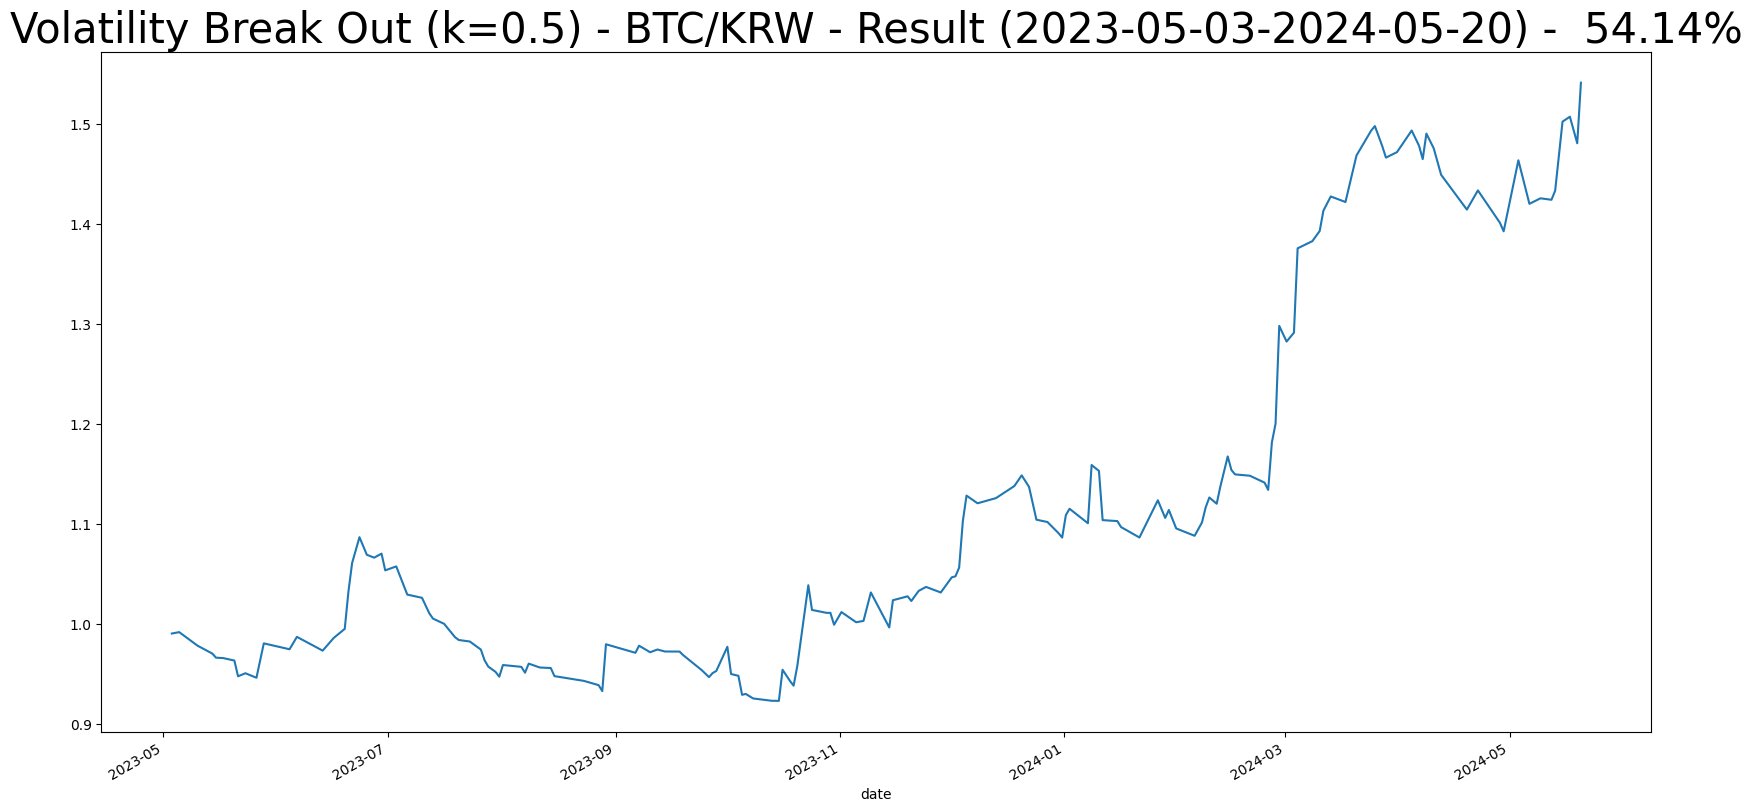

In [34]:
fig = 누적수익률.plot(figsize=(20,10), title=f'Volatility Break Out (k=0.5) - BTC/KRW - Result ({누적수익률.index[0].strftime("%Y-%m-%d")}-{누적수익률.index[-1].strftime("%Y-%m-%d")}) -  {(누적수익률.iloc[-1]-1)*100:.2f}%', fontsize=10)
fig.axes.title.set_size(30)